<a href="https://colab.research.google.com/github/ReemaAli1/AI-Project-SugerGame2021/blob/main/AssignmentML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1:**

To begin with, let's import all the required modules as shown below:

In [5]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz

**Step 2:**

To access the UCI heart dataset from Kaggle, let's write a function that returns the required dataset.

In [6]:
# import Dataset
balance_data = pd.read_csv('/content/drive/MyDrive/heart.csv')
balance_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Step 3:**

Out of 14 features in the dataset, let's just take 3 main factors that I thought would be reason for heart
disease in a person as "X" and the target column as "Y" which is nothing but heart disease is there or not.
The features for "X" are:
cp - Chest Pain
trestbps - resting blood pressure (Good Blood Circulation)
ca - number of major vessels (0-3) colored by flourosopy (Blocked Arteries)


In [8]:
# Separating the target variable
X = balance_data[['cp','trestbps','ca']]
Y = balance_data.target
X

,cp,trestbps,ca
0,3,145,0
1,2,130,0
2,1,130,0
3,1,120,0
4,0,120,0
...,...,...,...
298,0,140,0
299,3,110,0
300,0,144,2
301,0,130,1


**Step 4:**

Next step is to split the dataset in to train and test sets.

In [9]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,
random_state = 100)

y_train

3      1
162    1
112    1
278    0
209    0
      ..
66     1
53     1
79     1
280    0
8      1
Name: target, Length: 212, dtype: int64

**Step 5:**

Let's create a decision tree classifier model and train using Entropy as shown below:


In [10]:
# perform training with entropy
# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state =
100,max_depth = 3, min_samples_leaf = 5)
# Fit the model
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

**Step 6:**

Since, we are going to build decision trees using Entropy, let's write a function that will take the respective
models and X_test as input and return the predicted values for our approach. The function code is shown
below:


In [11]:
# Function to make predictions
def prediction(X_test, clf_object):
 # Predicton on test with giniIndex
 y_pred = clf_object.predict(X_test)
 print("Predicted values:")
 print(y_pred)
 return y_pred

**Step 7:**

Similarly, let's write another function to calculate the accuracy of both the models.

In [12]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
  print("Accuracy : ", accuracy_score(y_test,y_pred)*100)

**Step 8:**

Now, let's execute the above 2 functions to get the predicted values and accuracy of our model as shown
below:

In [13]:
print("Results Using Entropy:")
# Prediction using entropy
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)


Results Using Entropy:
Predicted values:
[0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1
 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0]
Accuracy :  76.92307692307693


**Step 9:**

Now let's try to print the tree created by the models and see which is the root node, which is nothing but
the feature that has most impact on heart disease. Again, we will write a function that take the model as
input as shown below:

In [14]:
def printTree(classifier):
 feature_names = ['Chest Pain', 'Blood Circulation',
 'Blocked Arteries']
 target_names = ['HD-Yes', 'HD-No']

 #Build the tree
 dot_data = tree.export_graphviz(classifier,
 out_file=None,feature_names=feature_names,
 class_names=target_names, filled = True)

 #Draw tree
 tr = graphviz.Source(dot_data, format ="png")
 return tr

**Step 10:**

Let's print the tree generated by Entropy model by using the printTree() function.


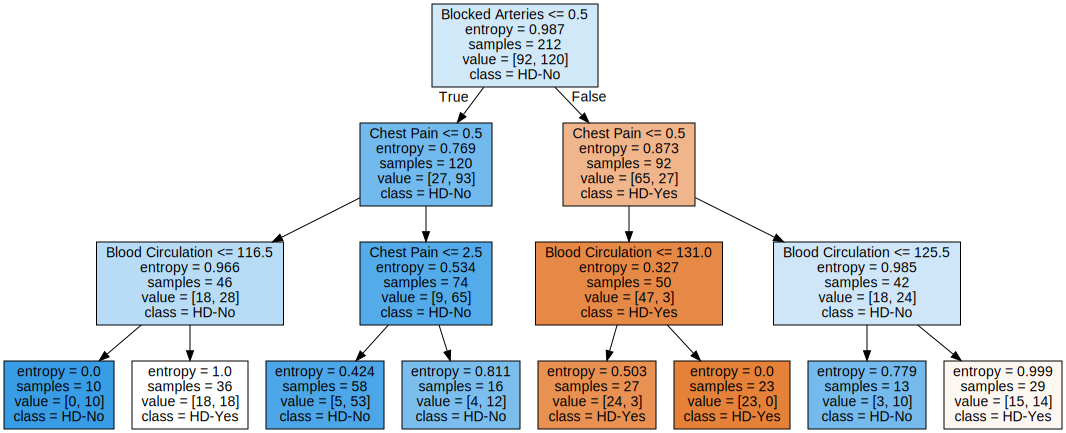

In [15]:
#Print entropy tree
tr_entropy = printTree(clf_entropy)
tr_entropy

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
